In [1]:
#! pip install yfinance
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

import numpy as np
import pandas as pd
#define the ticker symbol
tickerSymbol = 'AAPL'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
df = tickerData.history(period='1d', start='2020-1-1', end='2020-10-6')

#see your data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-31,71.754677,72.682763,71.653205,72.675339,100805600,0.0,0.0
2020-01-02,73.316325,74.395384,73.056464,74.333511,135480400,0.0,0.0
2020-01-03,73.541543,74.390431,73.380676,73.610840,146322800,0.0,0.0
2020-01-06,72.709988,74.236995,72.452596,74.197395,118387200,0.0,0.0
2020-01-07,74.207298,74.469636,73.623226,73.848442,108872000,0.0,0.0
...,...,...,...,...,...,...,...
2020-09-29,114.182093,114.939647,113.205238,113.723564,99382200,0.0,0.0
2020-09-30,113.424533,116.883389,113.255081,115.438042,142675200,0.0,0.0
2020-10-01,117.262163,117.341907,115.457978,116.414894,116120400,0.0,0.0



Simple return: $R_t=\frac{P_t - P_{t-1}}{P_{t-1}}$

Log-return: $r_t = \log\left(\frac{P_t}{P_{t-1}}\right)=\log{P_t}-\log{P_{t-1}}$

In [3]:
close = df["Close"]

simple_return = close.pct_change()

log_return = np.log(1+simple_return)


Populating the interactive namespace from numpy and matplotlib


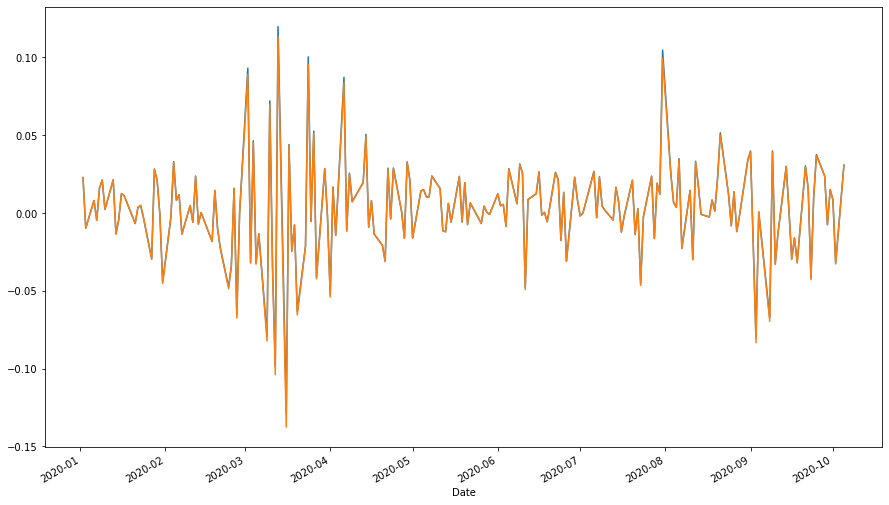

In [4]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

#apple["Adj. Close"].plot(grid = False) # Plot the adjusted closing price of AAPL

simple_return.plot()# Plot the lsimple return
log_return.plot() # Plot the logreturn

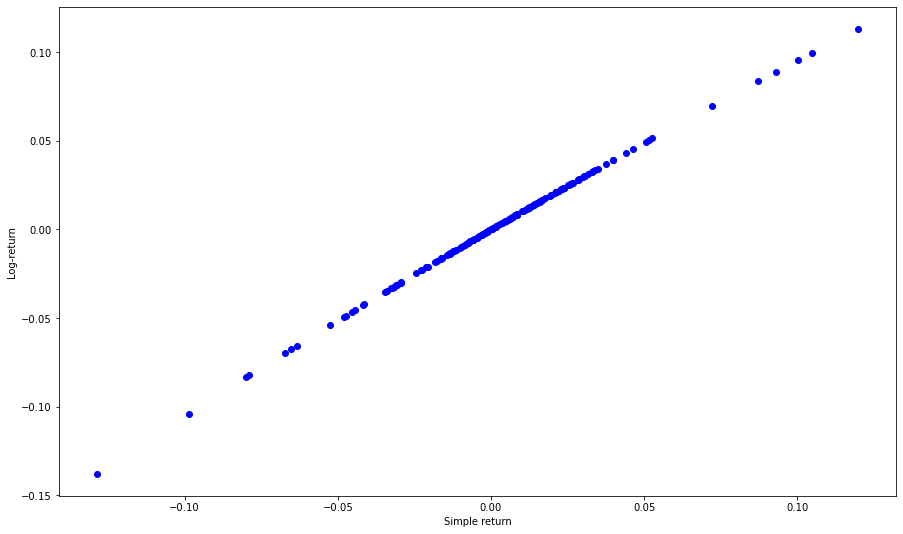

In [5]:
plt.plot(simple_return,log_return, 'o',c='blue')
plt.ylabel( 'Log-return' )
plt.xlabel( 'Simple return' )
#plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
plt.show()

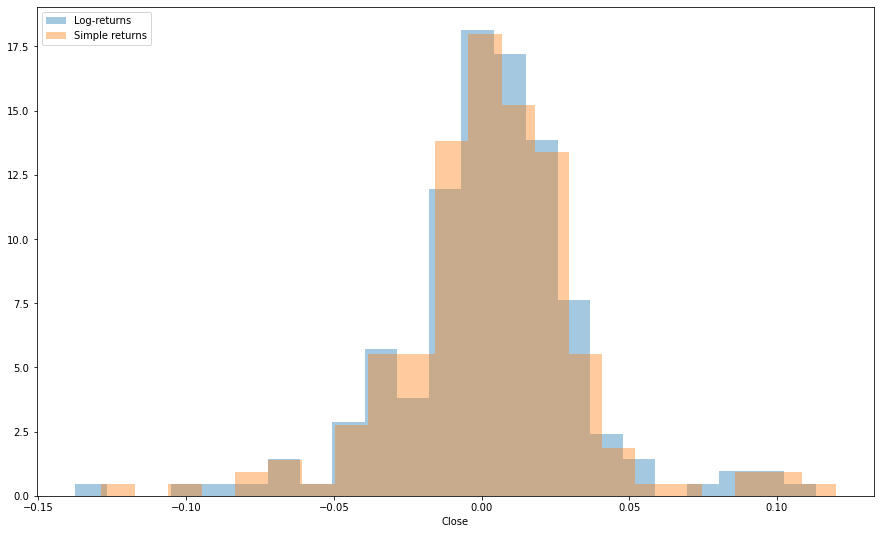

In [6]:
import seaborn as sns

# histogram
sns.distplot(log_return, kde=False, norm_hist=True,label='Log-returns') 
sns.distplot(simple_return, kde=False, norm_hist=True, label='Simple returns')  

legend(loc='upper left');

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()